# Market Basket Analysis

 Market basket analysis is used by companies to identify items that are frequently purchased together. Notice, when you visit the grocery store, how baby formula and diapers are always sold in the same aisle. Similarly, bread, butter, and jam are all placed near each other so that customers can easily purchase them together. The technique uncovers hidden correlations that cannot be identified by the human eye by using a set of statistical rules to identify product combinations that occur frequently in transactions

## How does market basket analysis work

This is a use-case of data science in marketing that increases company sales and drives business growth and commonly utilizes the Apriori algorithm.

## What is Apriori algorithm

The Apriori algorithm is the most common technique for performing market basket analysis

It is used for association rule mining, which is a rule-based process used to identify correlations between items purchased by users.

## How does apriori algorithm work

Let’s explore the process through an example of items most frequently bought together in a given store

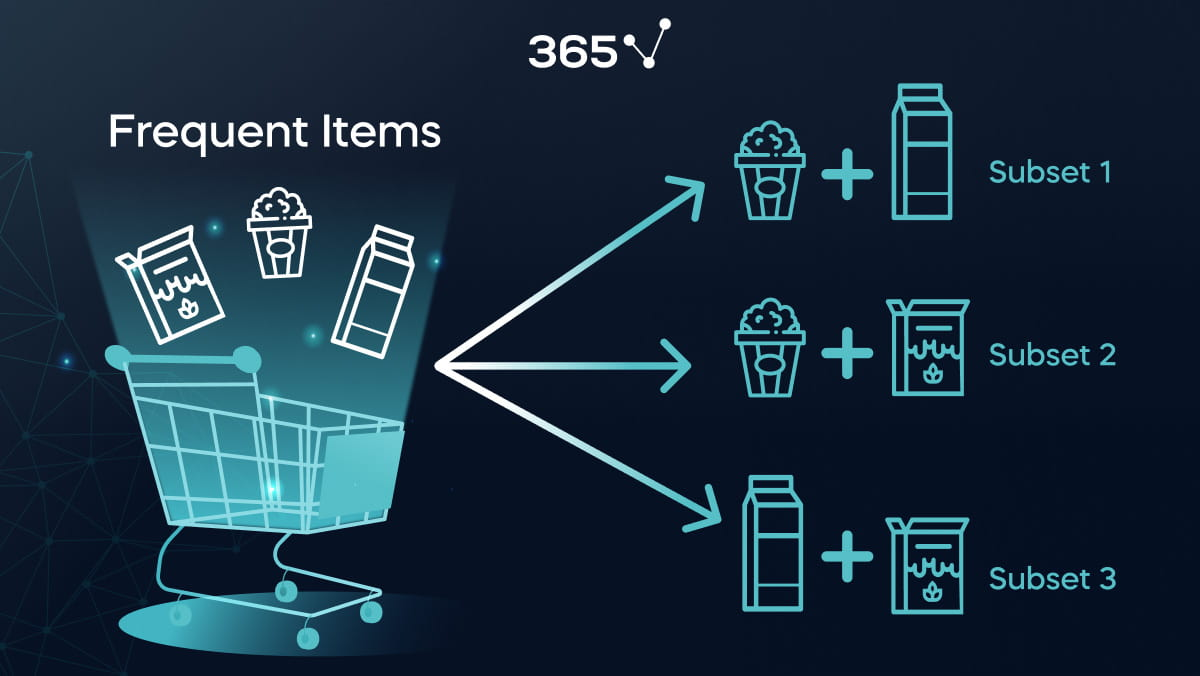

Most store customers have purchased popcorn, milk, and cereal together. Therefore, {popcorn, milk, cereal} is a frequent itemset as it appears in a majority of purchases. So, if a person grabs popcorn and milk, they will also be recommended cereal.

According to the Apriori algorithm, a subset of the frequent itemset is also frequent. Since {popcorn, milk, cereal} is a frequent itemset, this means that {popcorn, milk}, {popcorn, cereal}, and {milk, cereal} are also frequent. Due to this, if a customer only goes for popcorn, they will be recommended both milk and cereal as well.

## What are components of apriori algorithm

The Apriori algorithm has three main components:
* Support
* Lift
* Confidence


You can think of these as metrics that evaluate the relevance and popularity of each item combination.

Let’s illustrate. The baskets below contain items purchased by four customers at a grocery store.


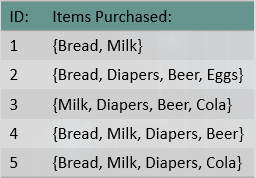

Lets calculate support,confidence and lift

### Support


The first component of the Apriori algorithm is support - we use it to assess the overall popularity of a given product with the following formula:

Support(item) = Transactions comprising the item / Total transactions

In the purchase data we’re working with, we have support(milk) = ¾ = 0.75. This means that milk is present in 75% of all purchases.

Similarly, we have support(bread) = 4/4 = 1. This means that bread is present in 100% of purchases.

A high support value indicates that the item is present in most purchases, therefore marketers should focus on it more.


### Confidence

Confidence tells us the likelihood of different purchase combinations. We calculate that using the following formula:

Confidence (Bread -> Milk) = Transactions comprising bread and milk / Transactions comprising bread

In this case, it can show how many users who purchased bread also bought milk:

Confidence (Bread -> Milk) = ¾ = 0.75

This means that 75% of the customers who bought bread also purchased milk.

### Lift

Finally, lift refers to the increase in the ratio of the sale of milk when you sell bread:

Lift = Confidence (Bread -> Milk) / Support(Bread) = 0.75/1 = 1.3.

This means that customers are 1.3 times more likely to buy milk if you also sell bread.

## Step -1 Installing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Step-2 Reading Dataset

In [3]:
df = pd.read_csv(r"C:\Users\Sandy\Downloads\Compressed\archive\Groceries_dataset.csv")

In [4]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


It contains information on purchases made at a grocery store, including the transaction date, item description, and a unique customer ID. We will use this data frame to perform market basket analysis and identify item combinations that are frequently bought together.

## Step-3 Data Preparation for Market Basket Analysis

Before we perform market basket analysis, we need to convert this data into a format that can easily be ingested into the Apriori algorithm. In other words, we need to turn it into a tabular structure comprising ones and zeros, as displayed in the bread and milk example above.

To achieve this, the first group items that have the same member number and date:

In [5]:
df['single_transaction'] = df['Member_number'].astype(str)+'_'+df['Date'].astype(str)

df.head()

,Member_number,Date,itemDescription,single_transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


This will provide us with a list of products purchased in the same transaction.

The “single_transaction” variable combines the member number, and date, and tells us the item purchased in one receipt.

Now, let’s pivot this table to convert the items into columns and the transaction into rows:

In [7]:
df2 = pd.crosstab(df['single_transaction'], df['itemDescription'])
df2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The resulting table tells us how many times each item has been purchased in one transaction.

There are over a hundred columns while most people only shop for 2-3 items, which is why this table is sparse and mostly comprised of zeroes.

The final data pre-processing step involves encoding all values in the above data frame to 0 and 1.

This means that even if there are multiples of the same item in the same transaction, the value will be encoded to 1 since market basket analysis does not take purchase frequency into consideration

In [8]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = df2.applymap(encode)

## Step 4: Build the Apriori Algorithm for Market Basket Analysis

Now, let’s import the Apriori algorithm from the MLXtend Python package and use it to discover frequently-bought-together item combinations.

In [9]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

C:\Users\Sandy\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998


Here, the “antecedents” and “consequents” columns show items that are frequently purchased together.

In this example, the first row of the dataset tells us that if a person were to buy bottled water, then they are also likely to purchase UHT-milk.

To get the most frequent item combinations in the entire dataset, let’s sort the dataset by support, confidence, and lift:

In [10]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
550,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
551,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


The resulting table shows that the four most popular product combinations that are frequently bought together are:

  * Rolls And Milk
  * Yogurt and Milk
  * Sausages and Milk
  * Soda and Vegetables
  
One reason for this could be that the grocery store ran a promotion on these items together or displayed them within the same line of sight to improve sales.